## Assignment 2  - DSC 478
### Kevin Thompson
##### Part A

In [496]:
#load libraries libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [497]:
#import data
train = pd.read_table('C:/Users/19148/Downloads/trainMatrixModified.txt',header = None)
train_lab = pd.read_table('C:/Users/19148/Downloads/trainClasses.txt',header = None,index_col = 0)
test = pd.read_table('C:/Users/19148/Downloads/testMatrixModified.txt',header = None)
test_lab = pd.read_table('C:/Users/19148/Downloads/testClasses.txt',header = None, index_col = 0)
terms = pd.read_table('C:/Users/19148/Downloads/modifiedterms.txt',header = None)

In [498]:
#converting from TD to DT matrix
DT_train = train.T
DT_test = test.T

In [499]:
DT_train.head()

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,2.0,2.0,2.0,1.0,8.0,6.0,2.0,8.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [500]:
np.array(train_lab).flatten()

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1

In [501]:
#terms #this is the dataframe of the terms
# train #this is the dataframe with words as objects, document as column
train.shape
numTerms = train.shape[0]
NDocs = train.shape[1]
print(numTerms)
print(NDocs)

5500
800


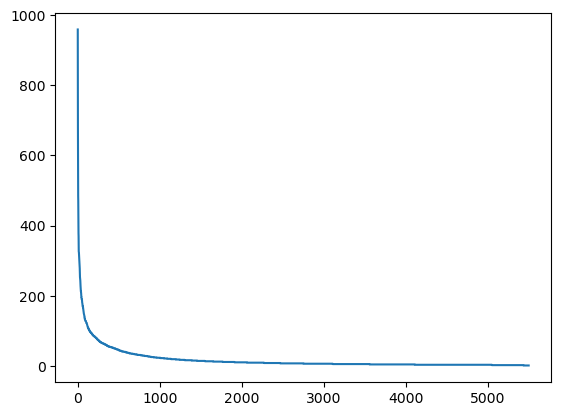

In [502]:
termFreqs = train.sum(axis = 1) #this will count the frequency of terms or sum up the values in the rows
#DT_train.sum(axis = 0) # could use this after we transpose the dataframe

plt.plot(sorted(termFreqs, reverse = True)) #this will give us our distribution
plt.show()

This is the shape we expect to see in a corpus which is a good sign

### Transform data to TFXIDF Weights

In [503]:
DF = pd.DataFrame([(train!=0).sum(1)]).T #transpose so we get 1 column rather than 1 row
DF

,0
0,50
1,7
2,10
3,800
4,108
...,...
5495,3
5496,3
5497,2
5498,2


In [504]:
#create a matrix with all entries = NDocs
NMatrix = np.ones(np.shape(train), dtype = float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)

[[800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 ...
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]]


In [505]:
# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.

IDF = np.log2(np.divide(NMatrix, np.array(DF)))
print(IDF)

[[4.   4.   4.   ... 4.   4.   4.  ]
 [6.84 6.84 6.84 ... 6.84 6.84 6.84]
 [6.32 6.32 6.32 ... 6.32 6.32 6.32]
 ...
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]]


In [506]:
# Finally compute the TFxIDF values for each document-term entry
TD_tfidf = train * IDF

pd.set_option("display.precision", 2)

TD_tfidf

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,8.00,0.00,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,13.67,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.51,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,12.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,23.11,2.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.78,0.0,0.0,0.0,0.0,0.0,0.0,2.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5496,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5497,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5498,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00


Up until now this is all mostly from the notebooks and has just been about preprocessing and preparing the data

### KNN

In [507]:


def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists

def knn_classify(x,D,K,labels,measure):
    from collections import Counter
    neigh_idx, distances = knn_search(x,D,K,measure)
    neigh_labels = labels[neigh_idx]
    count = Counter(neigh_labels)
    #print("labels for top",K,"neighbors: ", count)
    predicted_label = count.most_common(1)[0][0]
    return neigh_idx, predicted_label

In [508]:
DTM_train = np.array(DT_train)
DTM_test = np.array(DT_test)
train_lab_array = np.array(train_lab).flatten()
test_lab_array = np.array(test_lab).flatten()

In [509]:
def knn_evaluate1(test, test_labels, train, train_labels, K,measure):
    correct = 0
    error = 0
    #since the dataframes have been transposed, we compare rows by comparing 'columns' of the transposed matrix
    for i in range(test.shape[0]):
        top_K_neighbors, predicted_class = knn_classify(test[i], train,K, train_labels,measure)
        if predicted_class == test_labels[i]:
            correct += 1
        else:
            error += 1
    final = correct/test.shape[0]
    return final
Euclid = []
Cosine = []
for i in range(5,105,5):
    Cosine.append(knn_evaluate1(DTM_test,test_lab_array, DTM_train, train_lab_array,i,1))
    Euclid.append(knn_evaluate1(DTM_test,test_lab_array, DTM_train, train_lab_array,i,0))

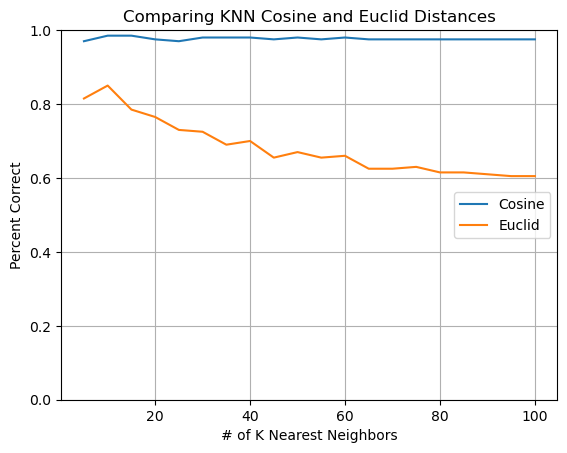

In [510]:
x = []
for i in range(5,105,5):
    x.append(i)
plt.plot(x, Cosine, label = "Cosine")
plt.plot(x, Euclid, label = "Euclid")
plt.ylabel("Percent Correct")
plt.xlabel("# of K Nearest Neighbors")
plt.grid(True)
plt.legend(loc = 'center right')
plt.title("Comparing KNN Cosine and Euclid Distances")
plt.ylim(0,1.0)
plt.show()

While Cosine distance is clearly more accurate here, what's also interesting is that it's a lot more stable regardless of how many neighbors we use for KNN. From 5-100, Cosine distance holds over 95% whereas there is a big decline for Euclidean distance. This is because Cosine is looking at the angle. Therefore, the magnitude of the vector is not considered in Cosine distance. From a post on linkdin I found this explanation: "This is because count frequency of identical texts do not necessarily imply closeness between documents. Here, we are more concerned about orientation/direction and not magnitude... even if one of these words occur a lot in a certain document, as compared to others, orientation achieves better semantic similarity than a pure distance measure. In this case, Cosine similarity will yield a more congruent result over Euclidean distance." https://www.linkedin.com/pulse/similarity-measures-data-science-euclidean-distance-cosine-wynn/

I also changed the scale of y axis because by default it made euclidean distance look a lot worse than it actually is.

In [511]:
DT_tfidf = TD_tfidf.T #transpose the matrix #this is training
DT_array = np.array(DT_tfidf) #turn matrix into an array
#can ignore/comment out/delete the previous cell where the original train matrix was turned to DT_train
DT_tfidf_test=IDF.T[0]*DTM_test

CosineIDF = []

for i in range(5,105,5):
    xx = (knn_evaluate1(DT_tfidf_test,test_lab_array, DT_array, train_lab_array,i,1))
    CosineIDF.append(xx)

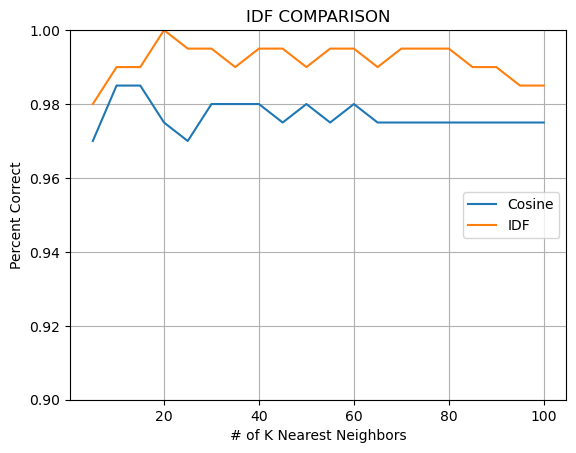

In [512]:
x = []
for i in range(5,105,5):
    x.append(i)
plt.plot(x, Cosine, label = "Cosine")
plt.plot(x, CosineIDF, label = "IDF")
plt.ylabel("Percent Correct")
plt.xlabel("# of K Nearest Neighbors")
plt.grid(True)
plt.legend(loc = 'center right')
plt.title("IDF COMPARISON")
plt.ylim(.90,1.0)
plt.show()

After modifying the data by converting to TFxIDF weights, KNN is more accurate. This makes sense because TFxIDF should make the more 'important' words more significant. Therefore the model should be more accurate.

### Rocchio

In [513]:
DT_array # weighted training data
def rocchio_train(train,labels):
    vector0 = np.zeros([5500])
    vector1 = np.zeros([5500]) # initialize empty arrays to sum into 
    train_lab_array
    for i in range(len(labels)):
        if labels[i] == 0:
            vector0 += train[i]
        elif labels[i] == 1:
            vector1 += train[i]

    prototype = {0: vector0, 1: vector1}
    return prototype 

print(rocchio_train(np.array(TD_tfidf.T),train_lab_array))

{0: array([228.  ,  27.35,  31.61, ...,   8.64,  17.29,  17.29]), 1: array([180.  ,  47.86, 107.47, ...,   8.64,   0.  ,   0.  ])}


In [514]:
from numpy.linalg import norm
def rocchio_classifier(prototype,instance):
        """This function will will compute cosine simularity between a vector and the two prototype vectors, then assign a predicted value to the vector"""
        cosine0 = np.dot(prototype[0],instance)/(norm(prototype[0])*norm(instance))
        cosine1 = np.dot(prototype[1],instance)/(norm(prototype[1])*norm(instance))
        if cosine0 > cosine1:
            predicted_label = 0
        elif cosine1 > cosine0:
            predicted_label = 1
        else:
            predicted_label = 0 #if the same just assign to 0 -- not sure if this is the right way to handle it but seems unlikely regardless
        sims = {0:cosine0,1:cosine1}
        return predicted_label, sims
rocchio_classifier(rocchio_train(np.array(TD_tfidf.T),train_lab_array),DT_tfidf_test[0]) #test function

(1, {0: 0.06588891360651927, 1: 0.24264174551610884})

In [515]:
def rocchio_evaluate(test, test_lab, prototype):
    correct_rocchio = 0 #counter to count correct predictions
    for i in range(len(test)):
        if rocchio_classifier(prototype,test[i])[0] == test_lab[i]:
            correct_rocchio += 1
    accuracy = correct_rocchio/len(test)
    
    return accuracy
    
rocchio_evaluate(DT_tfidf_test,test_lab_array,rocchio_train(np.array(TD_tfidf.T),train_lab_array)) 

0.98

The rocchio evaluation shows rocchio was 98% correct with this dataset. 

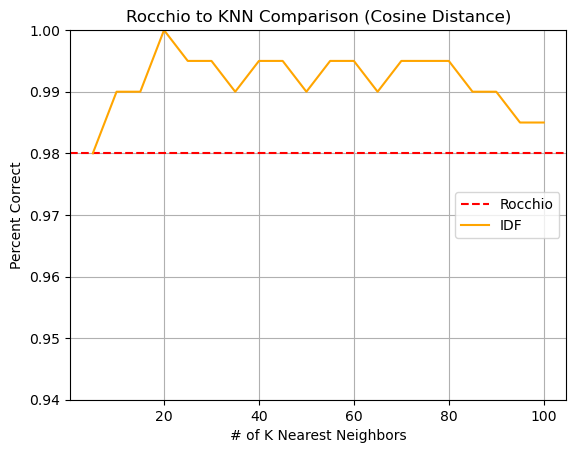

In [516]:
x = []
for i in range(5,105,5):
    x.append(i)
plt.axhline(rocchio_evaluate(DT_tfidf_test,test_lab_array,prototype), label = "Rocchio", color = 'red', linestyle = 'dashed')
plt.plot(x, CosineIDF, label = "IDF", color = "orange")
plt.ylabel("Percent Correct")
plt.xlabel("# of K Nearest Neighbors")
plt.grid(True)
plt.legend(loc = 'center right')
plt.title("Rocchio to KNN Comparison (Cosine Distance)")
plt.ylim(.94,1.0)
plt.show()

The TFxIDF KNN cosine distance prediction was more accurate. However, Rocchio is still extremely accurate at 98%. 

In [517]:
from sklearn.neighbors import NearestCentroid

sklearnRocchioCorrect = 0

clf = NearestCentroid()
clf.fit(TD_tfidf.T,train_lab_array)
NearestCentroid()
predictions = clf.predict(DT_tfidf_test)

for i in range(len(predictions)):
    if predictions[i] == test_lab_array[i]:
        sklearnRocchioCorrect += 1
percentCorrect = sklearnRocchioCorrect/200
percentCorrect

0.85

Comparing my rocchio to Sklearn, my rocchio was 98% whereas sklearn was 85%. At first I thought this was pretty concerning because I can't imagine I made a better function than sklearn so that is not an option. But from the documentation, the default metric is euclidean distance. Compared to the KNN with euclidean distance, this is pretty similar. Out of curiosity I'll try manhattan metric.

In [519]:
sklearnRocchioCorrect_manhattan = 0

clf = NearestCentroid(metric = 'manhattan')
clf.fit(TD_tfidf.T,train_lab_array)
NearestCentroid(metric = 'manhattan')
predictionsManhattan = clf.predict(DT_tfidf_test)

for i in range(len(predictionsManhattan)):
    if predictionsManhattan[i] == test_lab_array[i]:
        sklearnRocchioCorrect_manhattan += 1
percentCorrectManhattan = sklearnRocchioCorrect_manhattan/200
percentCorrectManhattan

C:\Users\19148\anaconda3\Lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
C:\Users\19148\anaconda3\Lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


0.98

This is worse. I don't see an option for Cosine distance though

In [520]:
sklearnRocchioCorrect_cosine = 0

clf = NearestCentroid(metric = 'cosine')
clf.fit(TD_tfidf.T,train_lab_array)
NearestCentroid(metric = 'cosine')
predictionsCosine = clf.predict(DT_tfidf_test)

for i in range(len(predictionsCosine)):
    if predictionsCosine[i] == test_lab_array[i]:
        sklearnRocchioCorrect_cosine += 1
percentCorrectCosine = sklearnRocchioCorrect_cosine/200
percentCorrectCosine

C:\Users\19148\anaconda3\Lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
C:\Users\19148\anaconda3\Lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


0.98

I wanted to just see if cosine was a metric and it is. Both my rocchio and sklearn using cosine is 98%. 